In [1]:
import numpy as np
import tensorflow as tf
from tensorflow import keras 
from tensorflow.keras.layers import Dense, Activation
from tensorflow.keras.optimizers import Adam
from tensorflow.keras.metrics import categorical_crossentropy
from tensorflow.keras.preprocessing.image import ImageDataGenerator
from tensorflow.keras.preprocessing import image 
from tensorflow.keras.models import Model 
from tensorflow.keras.applications import imagenet_utils
from sklearn.metrics import confusion_matrix
import itertools
import os 
import shutil
import random
import matplotlib.pyplot as pyplot
%matplotlib inline

Init Plugin
Init Graph Optimizer
Init Kernel


In [2]:
print(tf.__version__)

2.5.0


In [3]:
physical_devices = tf.config.experimental.list_physical_devices('GPU')
print(len(physical_devices))

1


In [4]:
mobile = tf.keras.applications.mobilenet.MobileNet()

Metal device set to: Apple M1


2021-08-10 02:44:42.356770: I tensorflow/core/common_runtime/pluggable_device/pluggable_device_factory.cc:305] Could not identify NUMA node of platform GPU ID 0, defaulting to 0. Your kernel may not have been built with NUMA support.
2021-08-10 02:44:42.356875: I tensorflow/core/common_runtime/pluggable_device/pluggable_device_factory.cc:271] Created TensorFlow device (/job:localhost/replica:0/task:0/device:GPU:0 with 0 MB memory) -> physical PluggableDevice (device: 0, name: METAL, pci bus id: <undefined>)


In [5]:
def prepare_image():
    img_path = 'Desktop/Dev/ML/Sign-Language-Digits-Dataset/Dog.jpeg'
    img = image.load_img(img_path, target_size=(224,224))
    img_array = image.img_to_array(img)
    img_array_expanded_dims = np.expand_dims(img_array, axis=0)
    return tf.keras.applications.mobilenet.preprocess_input(img_array_expanded_dims)

In [6]:
from IPython.display import Image

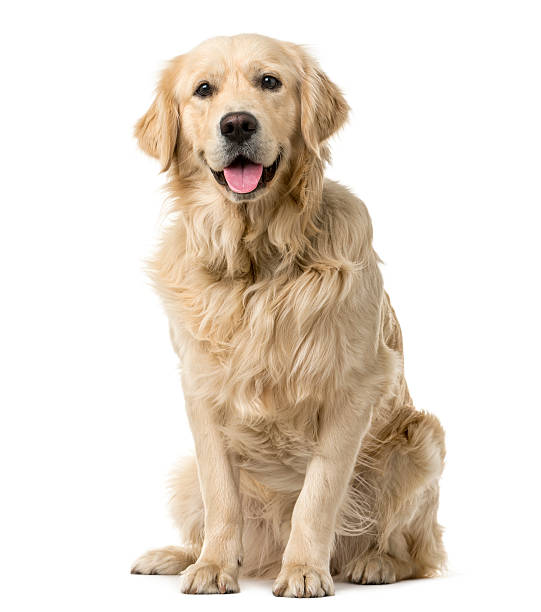

In [7]:
Image(filename = 'Desktop/Dev/ML/Sign-Language-Digits-Dataset/Dog.jpeg', width = 300, height = 200)

In [8]:
preprocessedimage = prepare_image()

In [9]:
prediction = mobile.predict(preprocessedimage)
results = imagenet_utils.decode_predictions(prediction)
results

2021-08-10 02:44:42.777350: I tensorflow/compiler/mlir/mlir_graph_optimization_pass.cc:176] None of the MLIR Optimization Passes are enabled (registered 2)
2021-08-10 02:44:42.777527: W tensorflow/core/platform/profile_utils/cpu_utils.cc:128] Failed to get CPU frequency: 0 Hz
2021-08-10 02:44:42.910911: I tensorflow/core/grappler/optimizers/custom_graph_optimizer_registry.cc:112] Plugin optimizer for device_type GPU is enabled.


[[('n02099601', 'golden_retriever', 0.98841757),
  ('n02104029', 'kuvasz', 0.0056003565),
  ('n02101556', 'clumber', 0.0014190899),
  ('n02101388', 'Brittany_spaniel', 0.0013872624),
  ('n02111500', 'Great_Pyrenees', 0.0009495394)]]

In [10]:
train_path = 'Desktop/Dev/ML/Sign-Language-Digits-Dataset/train'
test_path = 'Desktop/Dev/ML/Sign-Language-Digits-Dataset/test'
valid_path = 'Desktop/Dev/ML/Sign-Language-Digits-Dataset/valid'

In [11]:
train_batches = ImageDataGenerator(preprocessing_function=tf.keras.applications.mobilenet.preprocess_input).flow_from_directory(directory=train_path, target_size = (224,224), batch_size=10)

Found 1712 images belonging to 10 classes.


In [12]:
test_batches = ImageDataGenerator(preprocessing_function=tf.keras.applications.mobilenet.preprocess_input).flow_from_directory(directory=test_path, target_size = (224,224), batch_size=10)

Found 50 images belonging to 10 classes.


In [13]:
valid_batches = train_batches = ImageDataGenerator(preprocessing_function=tf.keras.applications.mobilenet.preprocess_input).flow_from_directory(directory=valid_path, target_size = (224,224), batch_size=10)

Found 300 images belonging to 10 classes.


In [14]:
###Making our own model###

In [15]:
mobile = tf.keras.applications.mobilenet.MobileNet()

In [16]:
mobile.summary()

Model: "mobilenet_1.00_224"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
input_2 (InputLayer)         [(None, 224, 224, 3)]     0         
_________________________________________________________________
conv1 (Conv2D)               (None, 112, 112, 32)      864       
_________________________________________________________________
conv1_bn (BatchNormalization (None, 112, 112, 32)      128       
_________________________________________________________________
conv1_relu (ReLU)            (None, 112, 112, 32)      0         
_________________________________________________________________
conv_dw_1 (DepthwiseConv2D)  (None, 112, 112, 32)      288       
_________________________________________________________________
conv_dw_1_bn (BatchNormaliza (None, 112, 112, 32)      128       
_________________________________________________________________
conv_dw_1_relu (ReLU)        (None, 112, 112, 32

In [17]:
x = mobile.layers[-6].output #Last 6 layers
output = Dense(units = 10, activation='relu')(x)

In [18]:
model = Model(inputs = mobile.input, outputs = output)

In [19]:
for layer in model.layers[:-23]:
    layer.trainable = False

In [20]:
model.summary()

Model: "model"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
input_2 (InputLayer)         [(None, 224, 224, 3)]     0         
_________________________________________________________________
conv1 (Conv2D)               (None, 112, 112, 32)      864       
_________________________________________________________________
conv1_bn (BatchNormalization (None, 112, 112, 32)      128       
_________________________________________________________________
conv1_relu (ReLU)            (None, 112, 112, 32)      0         
_________________________________________________________________
conv_dw_1 (DepthwiseConv2D)  (None, 112, 112, 32)      288       
_________________________________________________________________
conv_dw_1_bn (BatchNormaliza (None, 112, 112, 32)      128       
_________________________________________________________________
conv_dw_1_relu (ReLU)        (None, 112, 112, 32)      0     

In [21]:
model.compile(optimizer=Adam(learning_rate=0.0001), loss=categorical_crossentropy, metrics = ['Accuracy'])

In [22]:
model.fit(x=train_batches,validation_data=valid_batches,epochs=100,verbose=1)

Epoch 1/100


2021-08-10 02:44:43.765126: I tensorflow/core/grappler/optimizers/custom_graph_optimizer_registry.cc:112] Plugin optimizer for device_type GPU is enabled.


30/30 [==============================] - ETA: 0s - loss: 5.8057 - accuracy: 0.3547

2021-08-10 02:44:45.970602: I tensorflow/core/grappler/optimizers/custom_graph_optimizer_registry.cc:112] Plugin optimizer for device_type GPU is enabled.


30/30 [==============================] - 4s 111ms/step - loss: 5.8057 - accuracy: 0.3547 - val_loss: 5.5009 - val_accuracy: 0.4163
Epoch 2/100
30/30 [==============================] - 3s 106ms/step - loss: 3.9896 - accuracy: 0.3683 - val_loss: 7.4491 - val_accuracy: 0.4060
Epoch 3/100
30/30 [==============================] - 3s 112ms/step - loss: 3.0670 - accuracy: 0.4223 - val_loss: 7.5809 - val_accuracy: 0.3597
Epoch 4/100
30/30 [==============================] - 3s 110ms/step - loss: 2.4394 - accuracy: 0.5153 - val_loss: 6.2983 - val_accuracy: 0.2700
Epoch 5/100
30/30 [==============================] - 3s 111ms/step - loss: 2.0660 - accuracy: 0.6367 - val_loss: 4.3018 - val_accuracy: 0.1590
Epoch 6/100
30/30 [==============================] - 3s 105ms/step - loss: 1.9047 - accuracy: 0.7363 - val_loss: 3.8846 - val_accuracy: 0.1510
Epoch 7/100
30/30 [==============================] - 3s 104ms/step - loss: 0.2364 - accuracy: 0.8837 - val_loss: 8.2630e-08 - val_accuracy: 0.9000
Epoch 8

KeyboardInterrupt: 

In [26]:
test_labels = test_batches.classes
predictions = model.predict(x=test_batches, verbose = 0)
cm=confusion_matrix(y_true=test_labels, y_pred = predictions.argmax(axis=1))
test_batches.class_indices

2021-08-10 03:01:23.249341: I tensorflow/core/grappler/optimizers/custom_graph_optimizer_registry.cc:112] Plugin optimizer for device_type GPU is enabled.


{'0': 0,
 '1': 1,
 '2': 2,
 '3': 3,
 '4': 4,
 '5': 5,
 '6': 6,
 '7': 7,
 '8': 8,
 '9': 9}

Confusion matrix, without normalization
[[5 0 0 0 0 0 0 0 0 0]
 [5 0 0 0 0 0 0 0 0 0]
 [5 0 0 0 0 0 0 0 0 0]
 [5 0 0 0 0 0 0 0 0 0]
 [5 0 0 0 0 0 0 0 0 0]
 [5 0 0 0 0 0 0 0 0 0]
 [5 0 0 0 0 0 0 0 0 0]
 [5 0 0 0 0 0 0 0 0 0]
 [5 0 0 0 0 0 0 0 0 0]
 [5 0 0 0 0 0 0 0 0 0]]


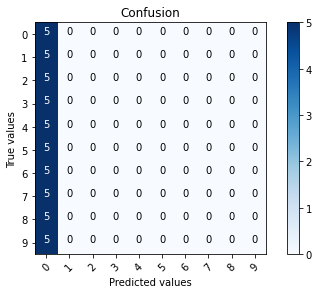

In [29]:
cm_plot_labels = ['0', '1', '2', '3', '4', '5', '6', '7', '8', '9']
plot_confusion_matrix(cm=cm, classes=cm_plot_labels, title="Confusion")

In [28]:
from matplotlib import pyplot as plt
def plot_confusion_matrix(cm, classes, normalize = False, title = 'Confusion Matrix', cmap = plt.cm.Blues):
    plt.imshow(cm, interpolation='nearest', cmap=cmap)
    plt.title(title)
    plt.colorbar()
    tick_marks = np.arange(len(classes))
    plt.xticks(tick_marks, classes, rotation = 45)
    plt.yticks(tick_marks, classes)
    
    if normalize:
        cm = cm.astype('float')/cm.sum(axis = 1)[:, np.newaxis]
        print("Normalized confusion matrix")
    else:
        print("Confusion matrix, without normalization")
    print(cm)
    thresh = cm.max()/2
    for i, j in itertools.product(range(cm.shape[0]), range(cm.shape[1])):
        plt.text(j, i, cm[i, j], horizontalalignment="center", color = "white" if cm[i, j] > thresh else "black")
    plt.tight_layout()
    plt.ylabel('True values')
    plt.xlabel('Predicted values')